<center><h1>Workflow (TensorFlow)</h1></center>

<h2>Importing the libraries and Collection of Data</h2>
<h4>Problem Definition - Classification</h4>
<h4>Data Collection - Using load_digits dataset from sklearn.datasets</h4>

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

<h2>Data Preprocessing</h2>
<h4>Data Cleaning - The load_digits dataset from scikit-learn is quite clean as it is designed for educational purposes and benchmark testing.</h4>
<h4>Feature Engineering - Standardizing the features and Converting the labels to categorical (one-hot encoding)</h4>
<h4>Train-Test-Split </h4>

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
y_train[0]

8

In [6]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

In [7]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

**This will be used in creating neural network**

<h2>Build the neural network model and Training</h2>

In [8]:
model=Sequential([
    Flatten(input_shape=(64,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\MUSKAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2869 - loss: 2.1262 - val_accuracy: 0.7698 - val_loss: 1.0498
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 0.7973 - val_accuracy: 0.8730 - val_loss: 0.5051
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9397 - loss: 0.3108 - val_accuracy: 0.9246 - val_loss: 0.3396
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1826 - val_accuracy: 0.9286 - val_loss: 0.2844
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.1179 - val_accuracy: 0.9325 - val_loss: 0.2479
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0726 - val_accuracy: 0.9325 - val_loss: 0.2438
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0611 - val_accuracy: 0.9286 - val_loss: 0.2273
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9957 - loss: 0.0452 - val_accuracy: 0.9246 - val_loss

<h2>Evaluate the model</h2>

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Test accuracy: {test_accuracy*100}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.0971 
Test accuracy: 96.66666388511658


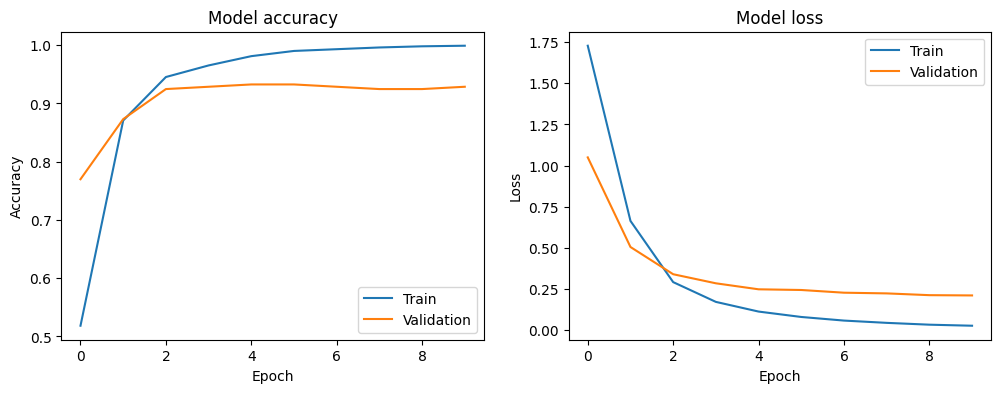

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [13]:
y_pred[0]

array([0.14455378, 0.14039525, 0.07494812, 0.03489469, 0.64479697,
       0.00943625, 0.99967724, 0.09840286, 0.5861118 , 0.11190873],
      dtype=float32)

In [14]:
y_pred_classes[0]

6

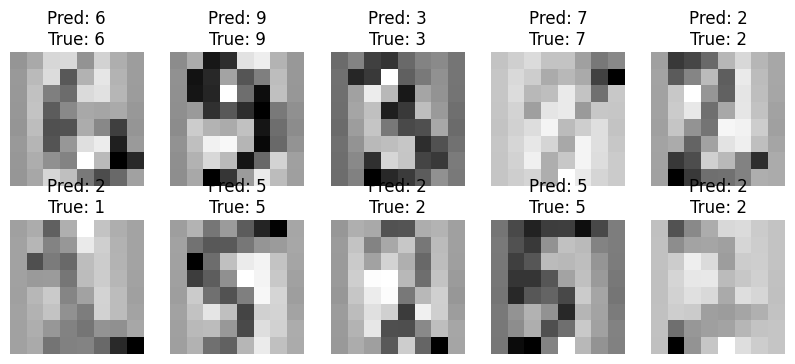

In [15]:
plt.figure(figsize=(10, 4))
for index, (image, prediction, true_label) in enumerate(zip(X_test[:10], y_pred_classes[:10], y_test[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f'Pred: {prediction}\nTrue: {true_label}')
    plt.axis('off')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [17]:
cm=confusion_matrix(y_test,y_pred_classes)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  1,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 62,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 56]], dtype=int64)

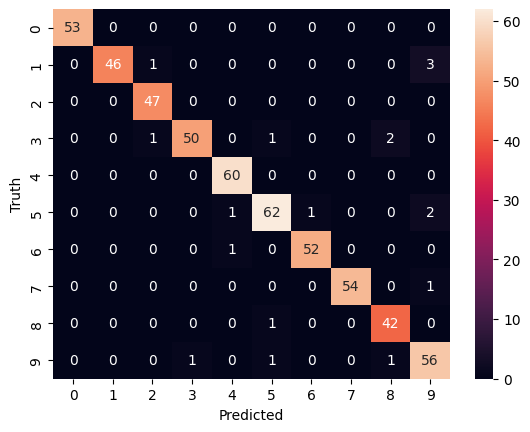

In [18]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h2>Model Saving</h2>
<h4>Using model.save() to save the model.</h4>

In [19]:
model.save('load_digits_TensorFlow.h5')

In [20]:
load_model=tf.keras.models.load_model('load_digits_TensorFlow.h5')

In [21]:
test_loss, test_accuracy = load_model.evaluate(X_test, y_test_categorical)
print(f'Loaded model test accuracy: {test_accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.0971  
Loaded model test accuracy: 0.9666666388511658
